In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive

drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [3]:
data = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/Capstone NLP/Womens Clothing Reviews Data.xlsx")

In [4]:
data.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1


In [5]:
data.shape

(23486, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   SubCategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer Age    23486 non-null  int64 
 7   Review Title    19676 non-null  object
 8   Review Text     22641 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend Flag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB


In [7]:
data.describe()

,Product ID,Customer Age,Rating,Recommend Flag
count,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362
std,203.298980,12.279544,1.110031,0.382216
min,0.000000,18.000000,1.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000
50%,936.000000,41.000000,5.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000
max,1205.000000,99.000000,5.000000,1.000000


### Exploratory Data Analysis

#### Univariate Analysis

Different Product Category in Dataset

<Axes: >

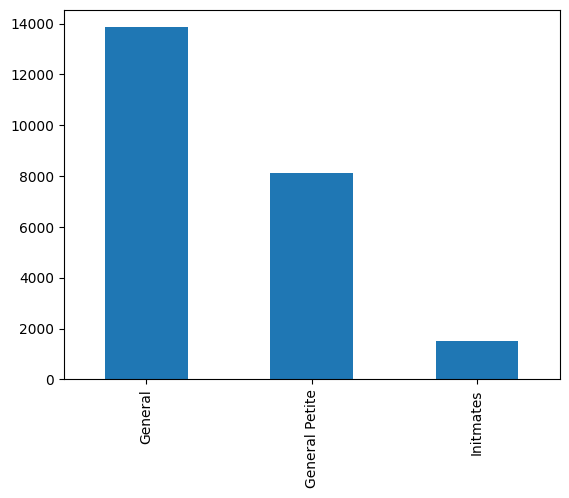

In [8]:
data['Category'].value_counts().plot(kind='bar')

Different Subcategories in Dataset

Text(0.5, 1.0, 'Count of Product in Subcategory1')

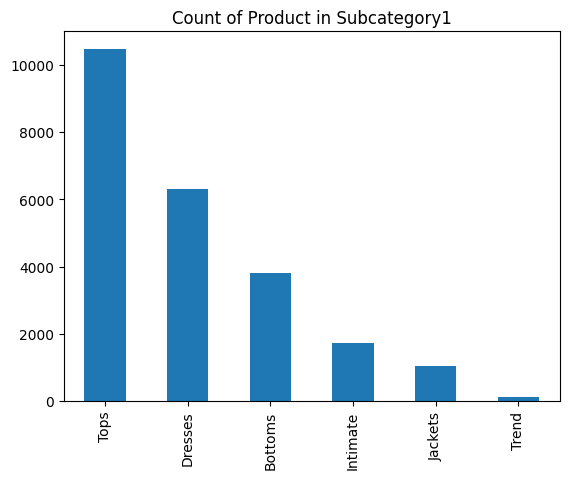

In [9]:
data['Subcategory1'].value_counts().plot(kind='bar')
plt.title('Count of Product in Subcategory1')

Text(0.5, 1.0, 'Count of Product in Subcategory2')

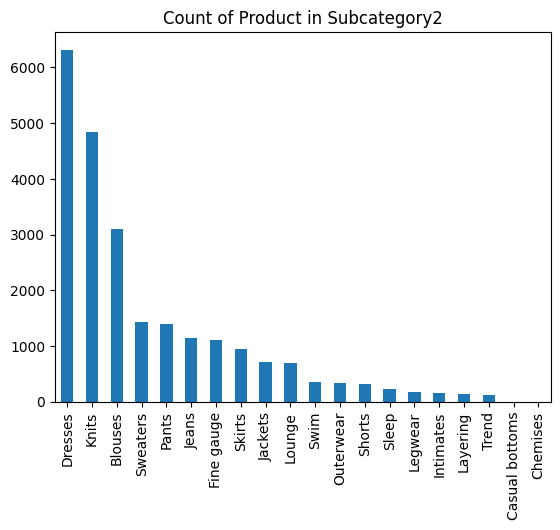

In [10]:
data['SubCategory2'].value_counts().plot(kind='bar')
plt.title('Count of Product in Subcategory2')

Different Locations Counts in dataset

<Axes: >

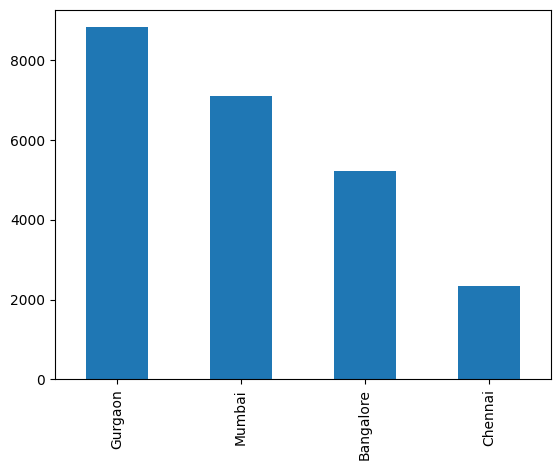

In [11]:
data['Location'].value_counts().plot(kind='bar')

Different Channels in Dataset

<Axes: >

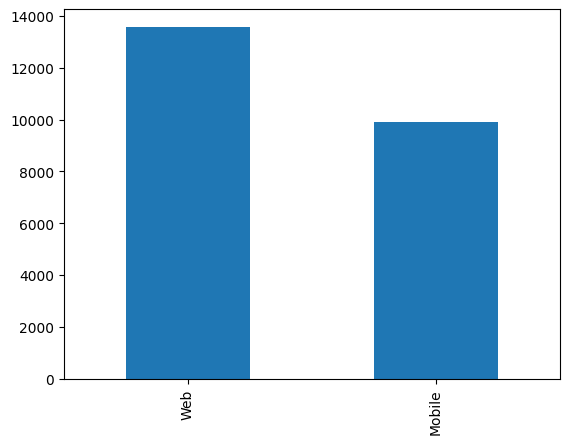

In [12]:
data['Channel'].value_counts().plot(kind='bar')

Distribution of Age of Customers

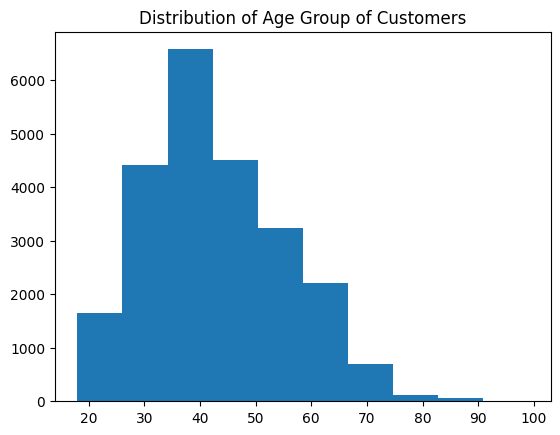

In [13]:
plt.hist(data['Customer Age'])
plt.title('Distribution of Age Group of Customers')
plt.show()

Distribution Of Ratings Given by customers

Text(0.5, 1.0, 'Ratings given by customer')

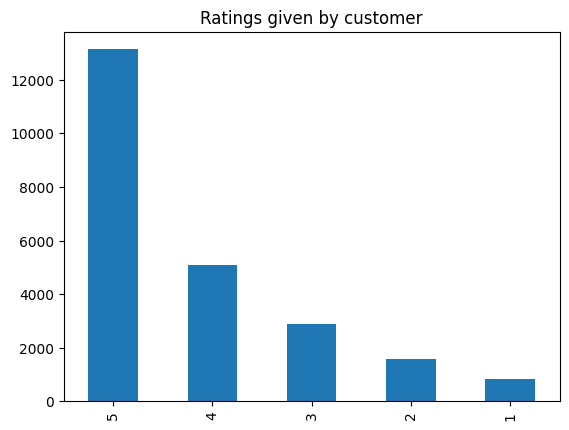

In [14]:
data['Rating'].value_counts().plot(kind='bar')
plt.title('Ratings given by customer')

Customer recommendations

Text(0.5, 1.0, 'Customers are recommending the products or not')

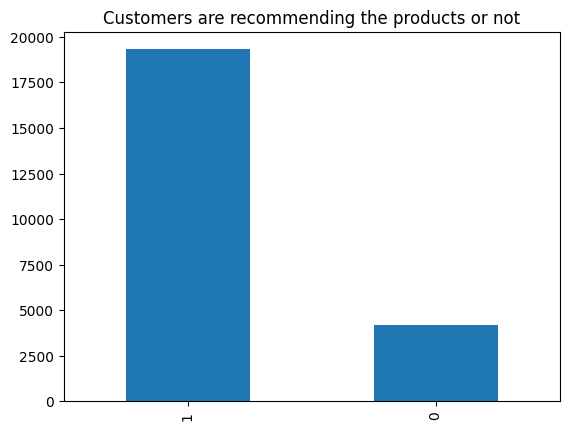

In [15]:
data['Recommend Flag'].value_counts().plot(kind='bar')
plt.title('Customers are recommending the products or not')

- There are 3 categories of products in which General Category products are mostly ordered
- Products are described by two subcategories Subcategory1 and Subcategory2.
- Most ordered items in Subcategory 1 are Tops and subcategory 2 are Dresses.
- Customers Locations are 4 cities and most customers are  from Gurgaon
- Most of the customers are of age between 30 and 50.
- Most of the customers have given 5 ,followed by 4 ratings and have recommended the items.

#### Bivariate and multivariate analysis

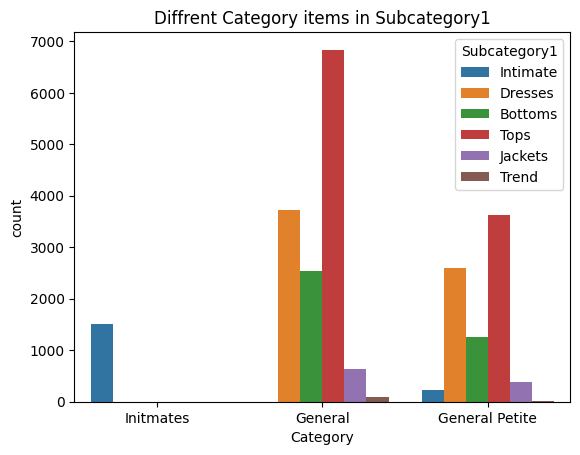

In [16]:
# Diffrent Category items in Subcategory1
sns.countplot(data=data,x='Category',hue='Subcategory1')
plt.title("Diffrent Category items in Subcategory1")
plt.show()

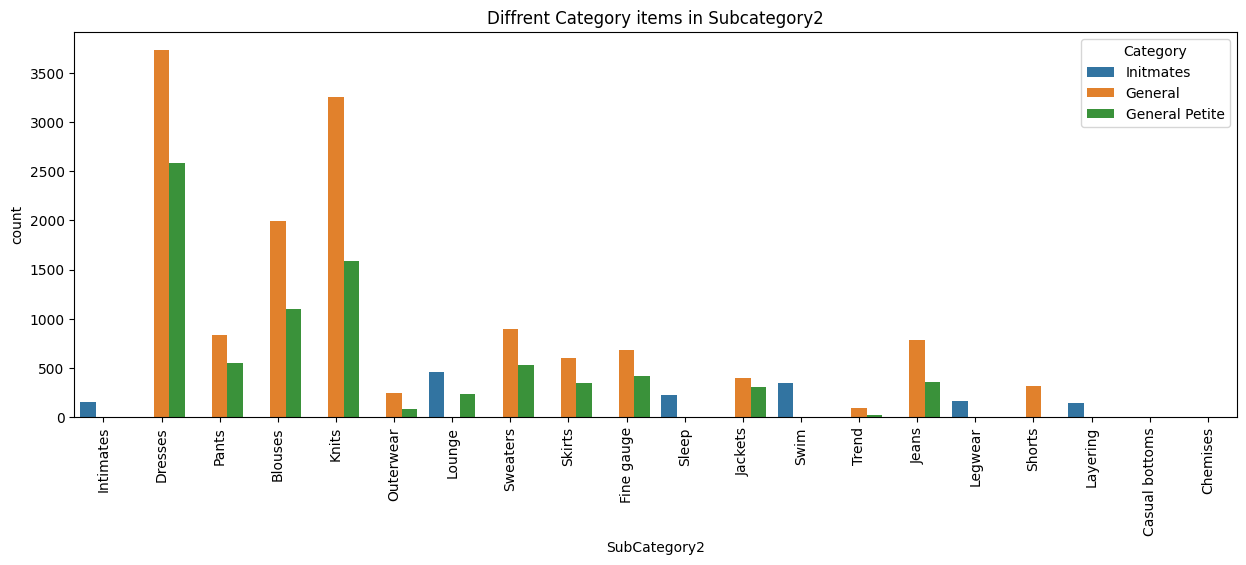

In [17]:
# Diffrent Category items in Subcategory2
plt.figure(figsize=(15,5))
sns.countplot(data=data,x='SubCategory2',hue='Category')
plt.title("Diffrent Category items in Subcategory2")
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Category', ylabel='count'>

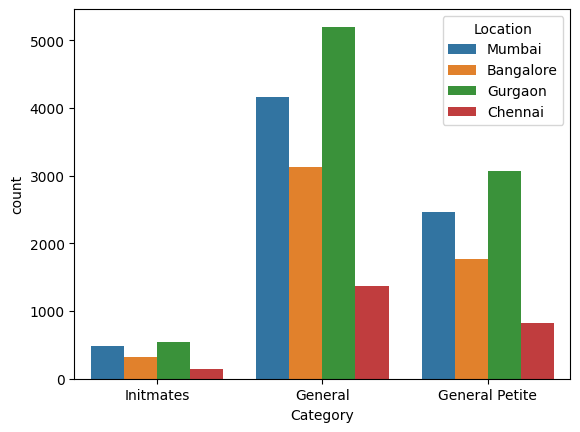

In [18]:
# Customer Locations and Product category relations
sns.countplot(data=data,x='Category',hue='Location')

<Axes: xlabel='Category', ylabel='count'>

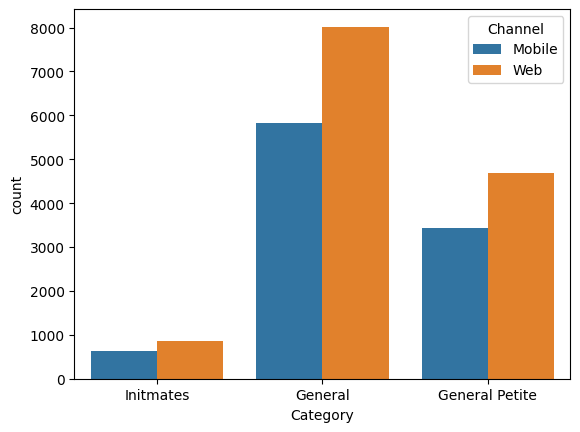

In [19]:
# How product category are ordered through different channels
sns.countplot(data=data,x='Category',hue='Channel')

<Axes: xlabel='Rating', ylabel='count'>

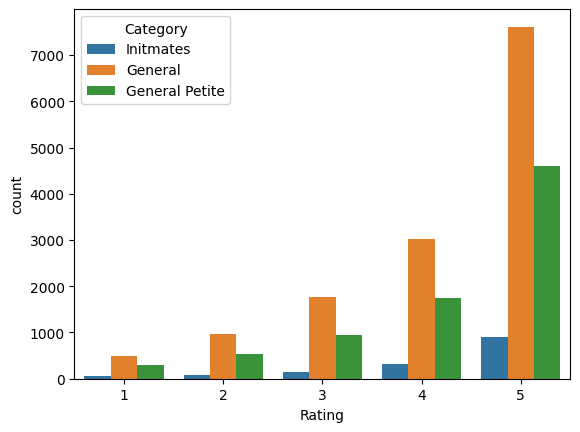

In [20]:
# Rating recieved by different Product Category
sns.countplot(data=data,x='Rating',hue='Category')

<Axes: xlabel='Recommend Flag', ylabel='count'>

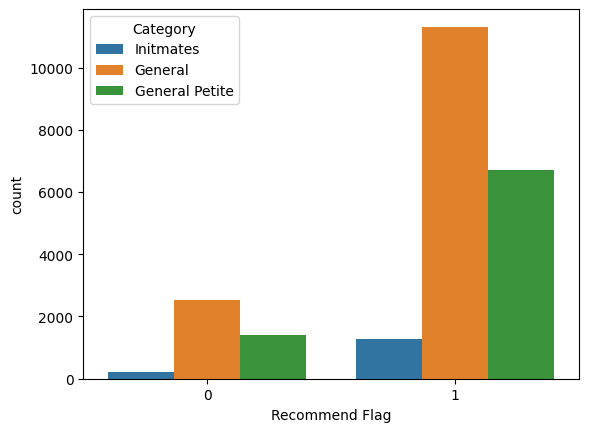

In [21]:
# Recommendations of Product Categories
sns.countplot(data=data,x='Recommend Flag',hue='Category')

Text(0.5, 1.0, 'Rating given by customers from different locations')

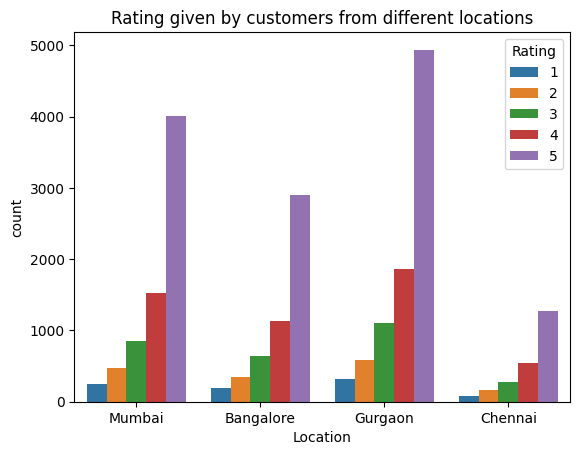

In [22]:
# Rating given by Different Location Customers
sns.countplot(data=data,x='Location',hue='Rating')
plt.title("Rating given by customers from different locations")

Text(0.5, 1.0, 'Rating given by customers using different channels')

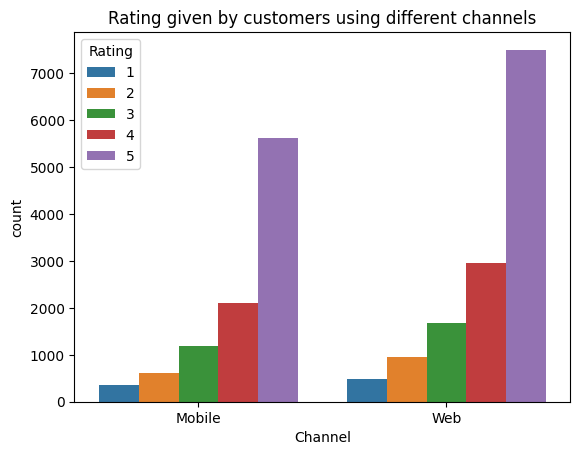

In [23]:
# Rating given by customers using different channels
sns.countplot(data=data,x='Channel',hue='Rating')
plt.title('Rating given by customers using different channels')

Text(0.5, 1.0, 'Recommendation by customers from different Locations')

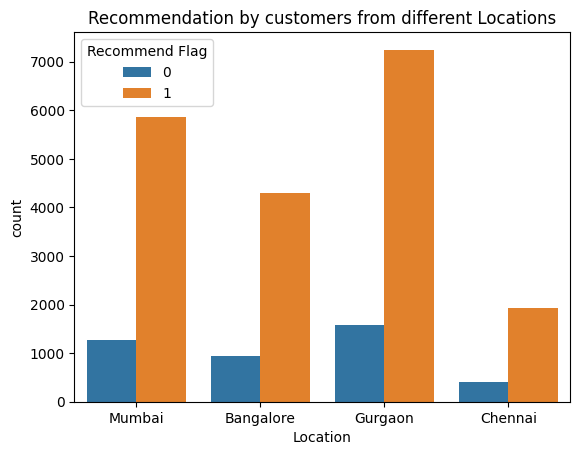

In [24]:
# Recommendation by customers from different Locations
sns.countplot(data=data,x='Location',hue='Recommend Flag')
plt.title("Recommendation by customers from different Locations")

Text(0.5, 1.0, 'Recommendation by customers using different Channels')

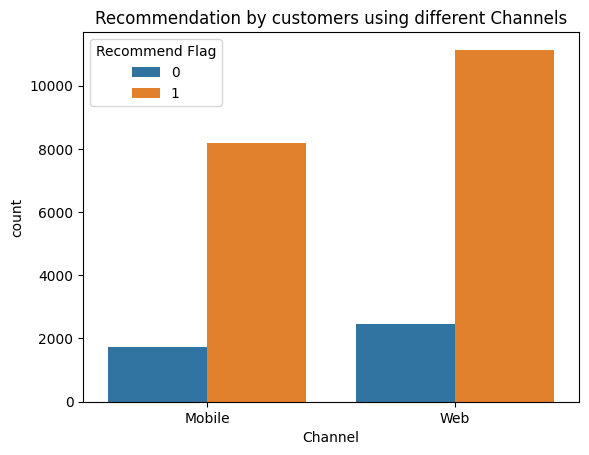

In [25]:
# Recommendation by customers from different channels
sns.countplot(data=data,x='Channel',hue='Recommend Flag')
plt.title("Recommendation by customers using different Channels")

Text(0.5, 1.0, 'Average rating on different Category from all Locations')

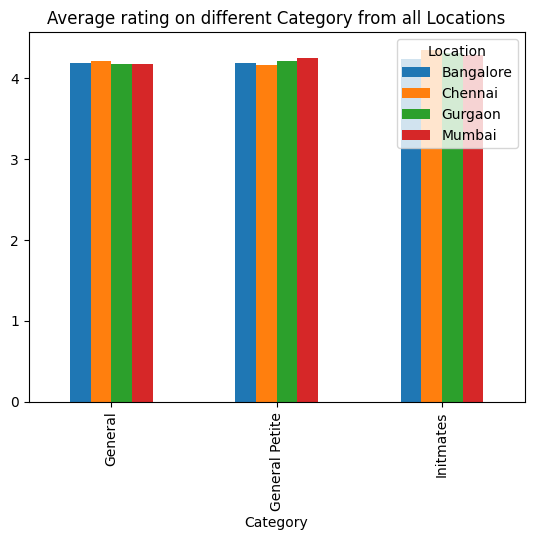

In [26]:
# Average rating on different Category from all Locations
data.pivot_table(index='Category',
                columns='Location',
                values='Rating',
                aggfunc='mean').plot(kind='bar')
plt.title("Average rating on different Category from all Locations")

Text(0.5, 1.0, 'Average rating on different Category from all Channels')

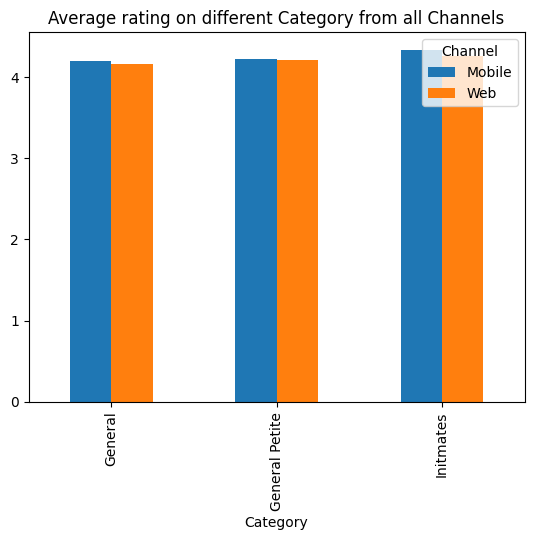

In [27]:
# Average rating on different Category from all Channel
data.pivot_table(index='Category',
                columns='Channel',
                values='Rating',
                aggfunc='mean').plot(kind='bar')
plt.title("Average rating on different Category from all Channels")

Removing all observations having null values

In [28]:
data = data.dropna().reset_index()

In [29]:
data.shape

(19662, 12)

In [30]:
data['Review'] = data['Review Title'] +","+ data['Review Text']

### Sentiment Analysis

In [31]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [32]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent = SentimentIntensityAnalyzer()
polarity = [sent.polarity_scores(i)['compound'] for i in data['Review']]
data['sentiment_score'] = polarity

In [33]:
# Distribution of sentiment score
data['sentiment_score'].describe()

count    19662.000000
mean         0.765405
std          0.368873
min         -0.973600
25%          0.770725
50%          0.916100
75%          0.960800
max          0.996200
Name: sentiment_score, dtype: float64

Text(0.5, 1.0, 'Distribution of sentiment scores on basis of customers reviews')

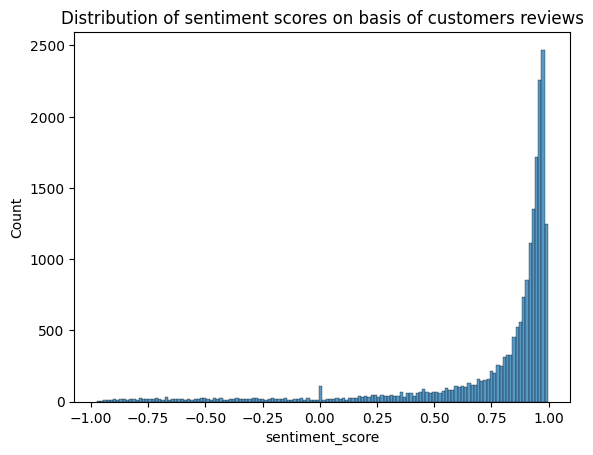

In [34]:
sns.histplot(data['sentiment_score'])
plt.title('Distribution of sentiment scores on basis of customers reviews')

In [35]:
# Dividing Customers Reviews as positive or negative sentiments on basis of sentiment score
data['sentiment'] = data['sentiment_score'].apply(lambda x:'Positive' if x>0.5 else 'Negative')

In [36]:
data.head()

,index,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag,Review,sentiment_score,sentiment
0,2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,"Some major design flaws,I had such high hopes ...",0.9427,Positive
1,3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,"My favorite buy!,I love, love, love this jumps...",0.7182,Positive
2,4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,"Flattering shirt,This shirt is very flattering...",0.9436,Positive
3,5,1080,General,Dresses,Dresses,Gurgaon,Web,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,"Not for the very petite,I love tracy reese dre...",0.9470,Positive
4,6,858,General Petite,Tops,Knits,Gurgaon,Mobile,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,"Cagrcoal shimmer fun,I aded this in my basket ...",0.8004,Positive


Text(0.5, 1.0, 'Count of Sentiments type in customers reviews')

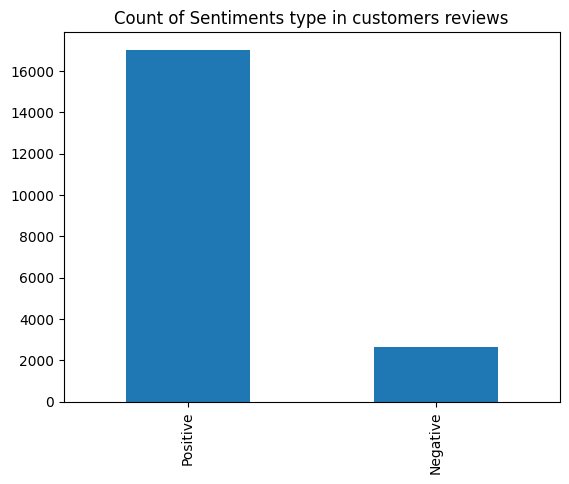

In [37]:
data['sentiment'].value_counts().plot(kind='bar')
plt.title('Count of Sentiments type in customers reviews')

Dividing dataset into two dataframes on basis of types of sentiments of customers reviews

In [38]:
positive_df = data[data['sentiment']=='Positive'].reset_index()
negative_df = data[data['sentiment']=='Negative'].reset_index()

- WordCloud for the positive reviews

In [39]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
from wordcloud import WordCloud

In [41]:
# Start with loading all necessary libraries
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

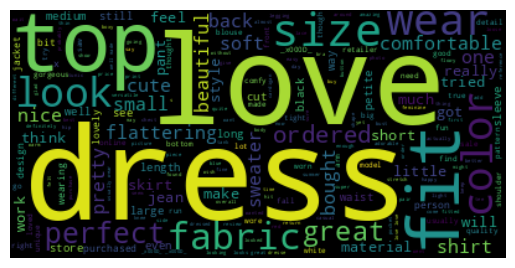

In [42]:
text = " ".join(x for x in positive_df['Review'])
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

- WordCloud for Negative reviews

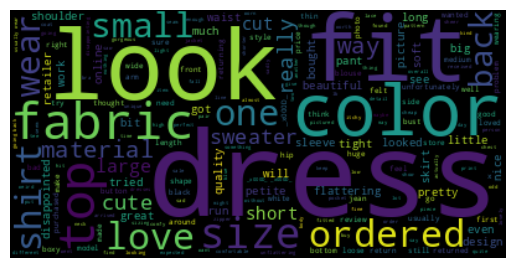

In [43]:
text = " ".join(x for x in negative_df['Review'])
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

Text(0.5, 1.0, 'Customer sentiment on different Product category')

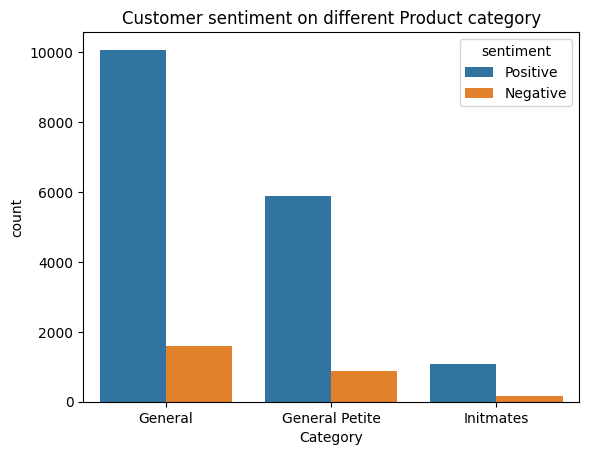

In [44]:
# Customer sentiment on different Product category
sns.countplot(data=data,x='Category',hue='sentiment')
plt.title("Customer sentiment on different Product category")

Text(0.5, 1.0, 'customer sentiment from different locations')

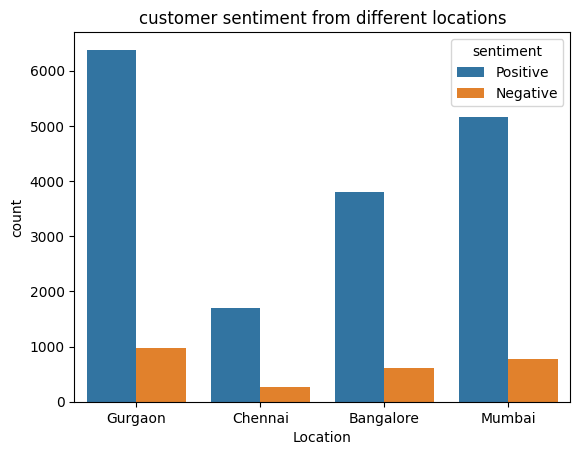

In [45]:
# customer sentiment from different locations
sns.countplot(data=data,x='Location',hue='sentiment')
plt.title('customer sentiment from different locations')

- Sentiments on basis of age group

In [46]:
def age_group(x): 
  if x <=35:
    return 'Young Adult'
  elif x<=60:
    return 'Adult'
  else:
    return 'Older'

In [47]:
data['Age Group'] = data['Customer Age'].apply(age_group)

Text(0.5, 1.0, 'Sentiments on basis of age group')

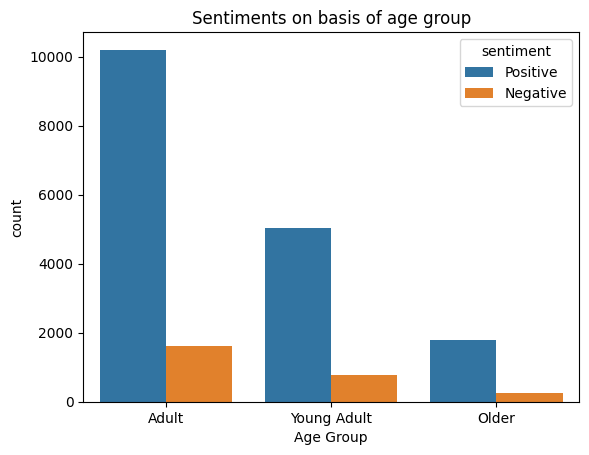

In [48]:
sns.countplot(data=data,x='Age Group',hue='sentiment')
plt.title('Sentiments on basis of age group')

- Worldcloud who recommended the store

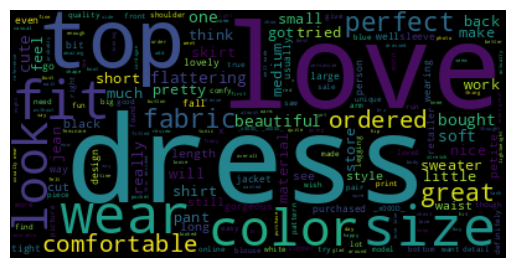

In [49]:
recom_df = data[data['Recommend Flag']==1]
text = " ".join(x for x in recom_df['Review'])
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

- Wordcloud who are not recommending the store

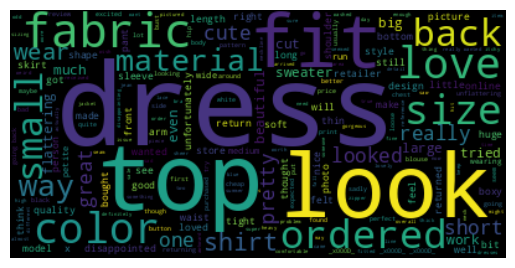

In [50]:
not_recom_df = data[data['Recommend Flag']==0]
text = " ".join(x for x in not_recom_df['Review'])
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

- most of the sentiments seems to be positive in customer reviews
- Words mostly used in reviews, by customers  who have recommended the store are dress,love,size
- with wordcloud help, customers who are not recommending the store have issues with dress,top,fit,look,order,fabric etc because these are the words mostly used in their reviews

### Modeling

In [51]:
df = data[['Review','Recommend Flag']]

#### Text Preprocessing

In [52]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [53]:
import string
punc = [x for x in string.punctuation]

In [54]:
# Writing a function to remove stopwords and punctuations in reviews
def clean_reviews(text):
  text = text.lower().split()
  words_to_remove = sw + punc
  text = [x for x in text if x not in words_to_remove]
  text = " ".join(text)
  return text

In [55]:
df['Clean_Review'] = df['Review'].apply(clean_reviews)

In [56]:
df.head()

,Review,Recommend Flag,Clean_Review
0,"Some major design flaws,I had such high hopes ...",0,"major design flaws,i high hopes dress really w..."
1,"My favorite buy!,I love, love, love this jumps...",1,"favorite buy!,i love, love, love jumpsuit. fun..."
2,"Flattering shirt,This shirt is very flattering...",1,"flattering shirt,this shirt flattering due adj..."
3,"Not for the very petite,I love tracy reese dre...",0,"petite,i love tracy reese dresses, one petite...."
4,"Cagrcoal shimmer fun,I aded this in my basket ...",1,"cagrcoal shimmer fun,i aded basket hte last mi..."


#### Lemmatization

In [57]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [58]:
def lemma(text):
  text = text.split()
  text = [lemmatizer.lemmatize(x) for x in text]
  return " ".join(text)

In [59]:
df['Clean_Review'] = df['Clean_Review'].apply(lemma)

- Removing special characters and digits from the text

In [60]:
df['Clean_Review'] = df['Clean_Review'].str.replace("[^a-zA-Z#]", " ")

In [61]:
def remove_shortwords(x):
  text = x.split()
  text = [word for word in text if len(word)> 2]
  text = (" ").join(text)
  return text

In [62]:
df['Clean_Review'] = df['Clean_Review'].apply(remove_shortwords)

In [63]:
df.head()

,Review,Recommend Flag,Clean_Review
0,"Some major design flaws,I had such high hopes ...",0,major design flaws high hope dress really want...
1,"My favorite buy!,I love, love, love this jumps...",1,favorite buy love love love jumpsuit fun flirt...
2,"Flattering shirt,This shirt is very flattering...",1,flattering shirt this shirt flattering due adj...
3,"Not for the very petite,I love tracy reese dre...",0,petite love tracy reese dresses one petite foo...
4,"Cagrcoal shimmer fun,I aded this in my basket ...",1,cagrcoal shimmer fun aded basket hte last mint...


- Splitting the data into train and test data

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X = df['Clean_Review']
y = df['Recommend Flag']

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#### Vectorization

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

In [68]:
vectorizer = CountVectorizer(max_df=0.8)
X_train =vectorizer.fit_transform(X_train).toarray()

#### Model Selection

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [71]:
X_test = vectorizer.transform(X_test).toarray()

In [72]:
# Evaluating model performance
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr

In [73]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

In [74]:
print(cr(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2875
           1       1.00      1.00      1.00     12854

    accuracy                           1.00     15729
   macro avg       1.00      1.00      1.00     15729
weighted avg       1.00      1.00      1.00     15729



In [75]:
print(cr(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.30      0.44       700
           1       0.87      0.99      0.93      3233

    accuracy                           0.87      3933
   macro avg       0.88      0.64      0.69      3933
weighted avg       0.87      0.87      0.84      3933



Text(0.5, 1.0, 'Confusion matrix for testing Dataset')

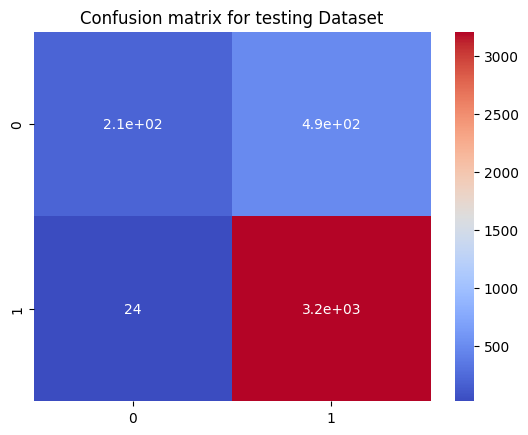

In [76]:
sns.heatmap(cm(y_test,y_pred_test),annot=True,cmap='coolwarm')
plt.title("Confusion matrix for testing Dataset")

### Topic Modeling

In [77]:
from nltk.collocations import FreqDist
# Function to plot most frequent words
def freq_words(x,terms=20):
  all_words = " ".join([text for text in x])
  all_words = all_words.split()
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()),
                           'count':list(fdist.values())})
  
  # selecting the 20 most frequent words
  d = words_df.nlargest(columns='count',n=terms)
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d,x='word',y='count')
  ax.set(ylabel='Count')
  plt.show()

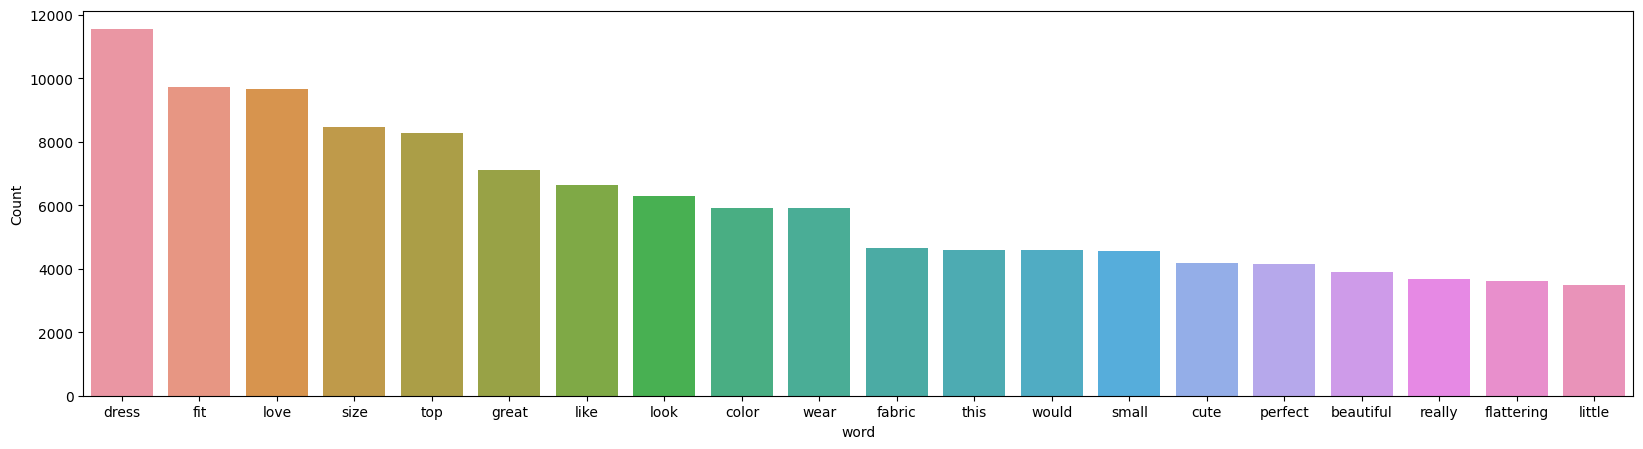

In [78]:
freq_words(df['Clean_Review'])

In [79]:
reviews = [r for r in df['Clean_Review']]

In [80]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['favorite', 'buy', 'love', 'love', 'love', 'jumpsuit', 'fun', 'flirty', 'fabulous', 'every', 'time', 'wear', 'get', 'nothing', 'great', 'compliments']


In [81]:
from gensim.corpora import Dictionary

#### Building an LDA model

- We will start by creating the term dictionary of our corpus, where every unique term is assigned an index

In [82]:
dictionary = Dictionary(tokenized_reviews)

- Then we will convert the list of reviews into a Document Term Matrix using the dictionary prepared above

In [83]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews]

In [84]:
# Creating the object for LDA model using gensim library
import gensim
LDA = gensim.models.ldamodel.LdaModel

In [85]:
# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=3, random_state=100,
                chunksize=100, passes=10)

In [86]:
lda_model.print_topics()

[(0,
  '0.023*"size" + 0.017*"like" + 0.017*"top" + 0.017*"small" + 0.017*"fit" + 0.013*"look" + 0.013*"would" + 0.011*"fabric" + 0.010*"large" + 0.010*"ordered"'),
 (1,
  '0.032*"love" + 0.029*"great" + 0.018*"color" + 0.017*"sweater" + 0.016*"fit" + 0.016*"soft" + 0.015*"wear" + 0.014*"perfect" + 0.014*"comfortable" + 0.012*"look"'),
 (2,
  '0.071*"dress" + 0.019*"beautiful" + 0.019*"love" + 0.012*"wear" + 0.010*"this" + 0.009*"flattering" + 0.009*"fit" + 0.009*"gorgeous" + 0.009*"perfect" + 0.008*"one"')]

- Building model for predicting the ratings based on reviews

In [87]:
df2 = pd.merge(df['Clean_Review'],data['Rating'],right_index=True,left_index=True)

In [88]:
from sklearn.model_selection import train_test_split
X = df2['Clean_Review']
y = df2['Rating']

In [89]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [90]:
vectorizer = CountVectorizer(max_df=0.8)
X_train =vectorizer.fit_transform(X_train).toarray()

In [91]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [92]:
X_test = vectorizer.transform(X_test).toarray()

In [93]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

In [94]:
print(cr(y_train,y_pred_train))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       551
           2       1.00      1.00      1.00      1063
           3       1.00      1.00      1.00      2045
           4       1.00      1.00      1.00      3452
           5       1.00      1.00      1.00      8618

    accuracy                           1.00     15729
   macro avg       1.00      1.00      1.00     15729
weighted avg       1.00      1.00      1.00     15729



In [95]:
print(cr(y_test,y_pred_test))

              precision    recall  f1-score   support

           1       0.62      0.04      0.07       140
           2       0.38      0.03      0.06       297
           3       0.32      0.18      0.23       419
           4       0.40      0.08      0.13       837
           5       0.64      0.99      0.77      2240

    accuracy                           0.60      3933
   macro avg       0.47      0.26      0.25      3933
weighted avg       0.53      0.60      0.50      3933



Text(0.5, 1.0, 'Confusion matrix for testing Dataset')

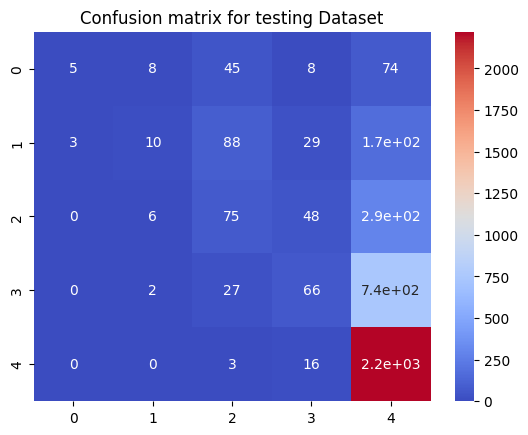

In [96]:
sns.heatmap(cm(y_test,y_pred_test),annot=True,cmap='coolwarm')
plt.title("Confusion matrix for testing Dataset")

- Trying pipeline for better improvement 

In [98]:
X = df2['Clean_Review']
y = df2['Rating']

In [101]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [108]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))


accuracy 0.5743707093821511
